# Time series forecasting

U.S. Bureau of Labour Statistics releases Current Employment Statistics monthly. Let’s say you are an official working at the U.S. Bureau of Labour Statistics and you are looking to estimate the number of unemployed people.   
  
The dataset given below contains information on the monthly unemployment rate. It has two columns, ‘DATE’ (the date of measuring the unemployment rate) and ‘UNRATE’ (represents the number of unemployed as a percentage of the labour force).  
  
This is an Auto Regressive model assignment where we have to forecast the unemployment rate using the different Auto Regressive forecasting techniques.


# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [3]:
data = pd.read_csv('UNRATE.csv', header = None)
data.columns = ['Month','UnemploymentRate']
data['Month'] = pd.to_datetime(data['Month'], format='%d-%m-%Y')
data = data.set_index('Month')
data.head(12)

,UnemploymentRate
Month,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
1948-06-01,3.6
1948-07-01,3.6
1948-08-01,3.9
1948-09-01,3.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 867 entries, 1948-01-01 to 2020-03-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UnemploymentRate  867 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


# Time series analysis

## Plot time series data

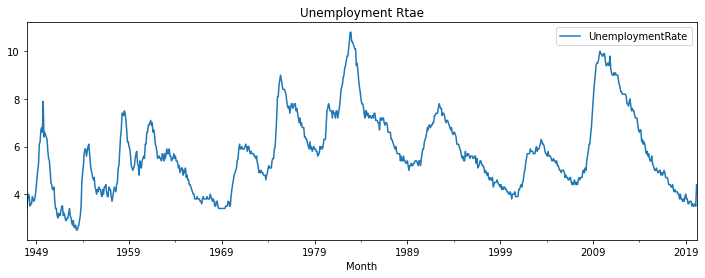

In [5]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Unemployment Rtae')
plt.show(block=False)

## Outlier detection

### Box plot and interquartile range

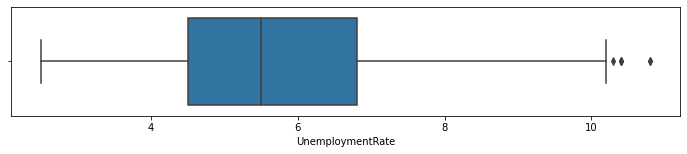

In [6]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['UnemploymentRate'],whis=1.5)

### Histogram plot

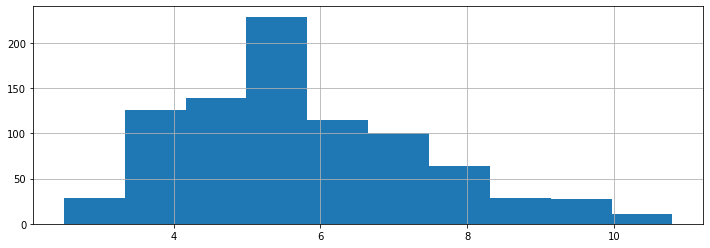

In [7]:
fig = data.UnemploymentRate.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

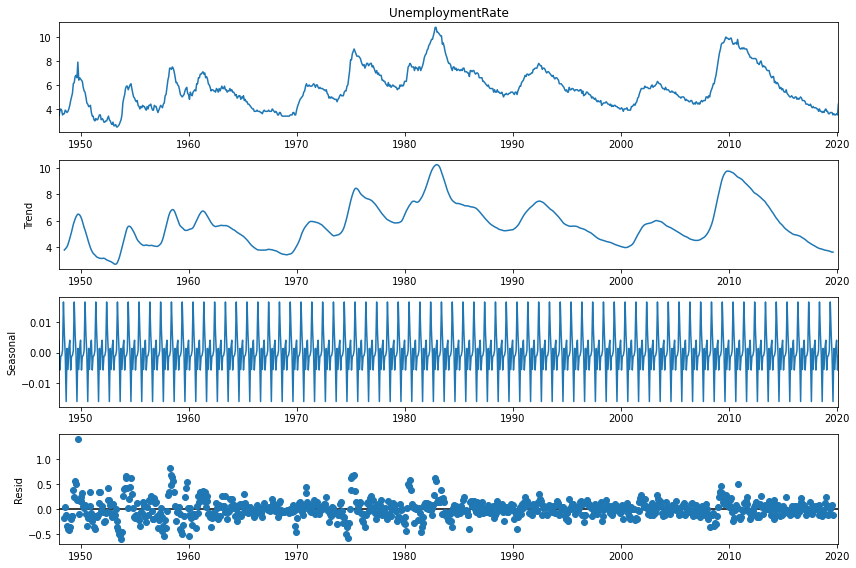

In [8]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.UnemploymentRate, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

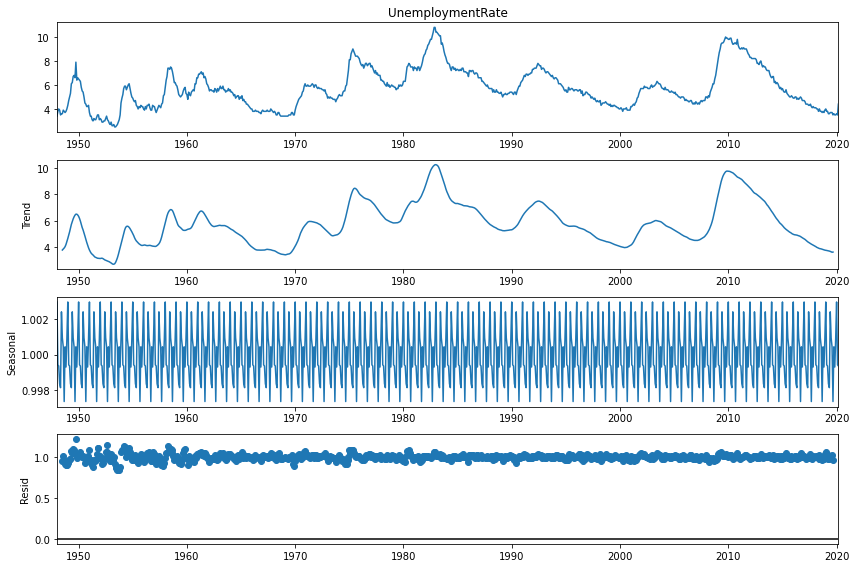

In [9]:
decomposition = sm.tsa.seasonal_decompose(data.UnemploymentRate, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [10]:
train_len = 612
train = data[0:train_len] # first 612 months as training set
test = data[train_len:] # last 255 months as out-of-time test set

In [11]:
train.shape

(612, 1)

In [12]:
test.shape

(255, 1)

# Simple time series methods

## Naive method

In [13]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['UnemploymentRate'][train_len-1]

### Plot train, test and forecast

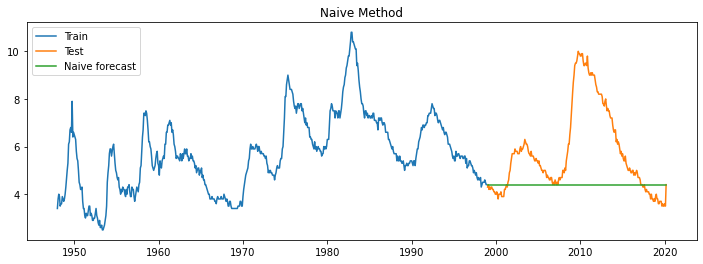

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [16]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_naive['naive_forecast'])/test['UnemploymentRate'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.5


## Simple moving average method

In [17]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['UnemploymentRate'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

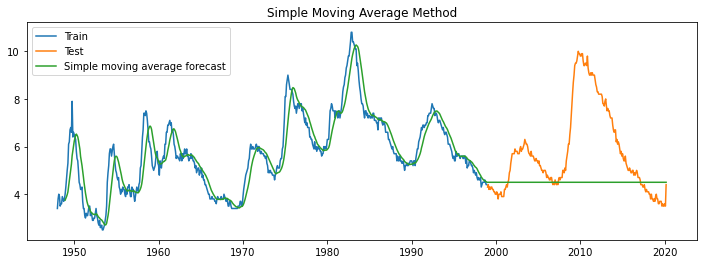

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [19]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_sma['sma_forecast'][train_len:])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99


# Exponential smoothing methods

## Simple exponential smoothing

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['UnemploymentRate'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(255)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Plot train, test and forecast

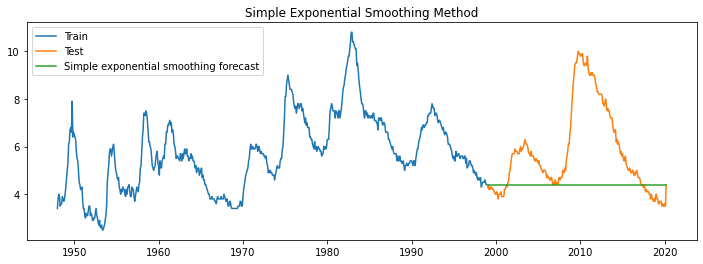

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [22]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_ses['ses_forecast'])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50


# Auto Regressive methods

## Stationarity vs non-stationary time series

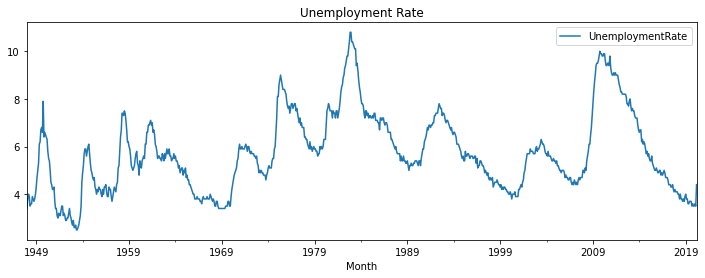

In [23]:
data['UnemploymentRate'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Unemployment Rate')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [24]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['UnemploymentRate'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.143963
Critical Values @ 0.05: -2.86
p-value: 0.023466


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [25]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['UnemploymentRate'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.464446
Critical Values @ 0.05: 0.46
p-value: 0.049674


### Box Cox transformation to make variance constant

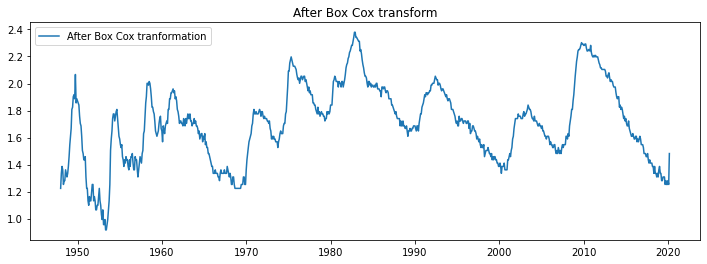

In [26]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['UnemploymentRate'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

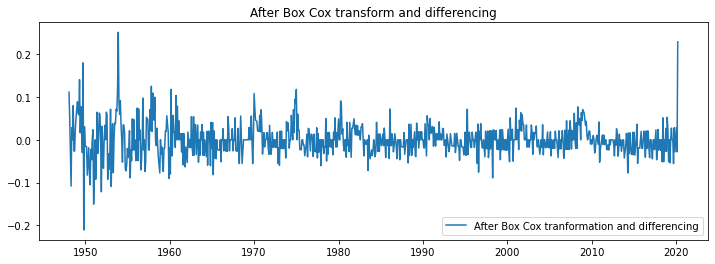

In [27]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [28]:
data_boxcox_diff.dropna(inplace=True)

In [29]:
data_boxcox_diff.tail()

Month
2019-11-01   -0.028171
2019-12-01    0.000000
2020-01-01    0.028171
2020-02-01   -0.028171
2020-03-01    0.228842
dtype: float64

In [83]:
data_boxcox_diff.shape

(866,)

### Augmented Dickey-Fuller (ADF) test

In [30]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -8.918955
Critical Values @ 0.05: -2.86
p-value: 0.000000


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [31]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.062761
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Autocorrelation function (ACF)

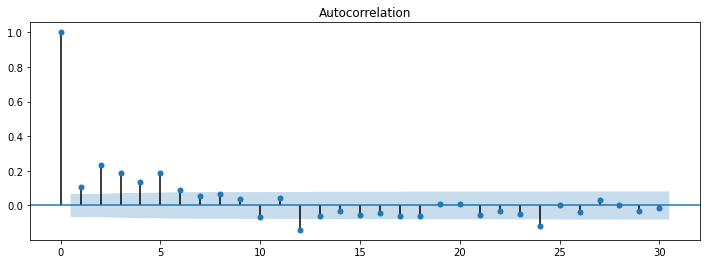

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

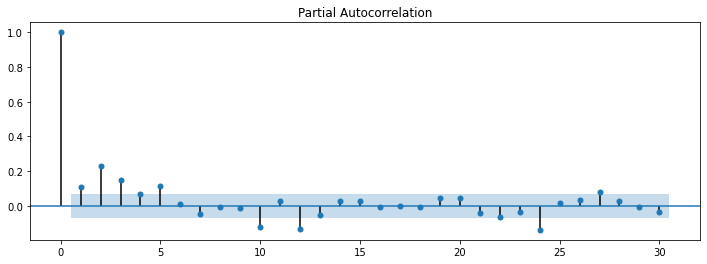

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [34]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [35]:
train_data_boxcox_diff

Month
1948-02-01    0.111226
1948-03-01    0.051293
1948-04-01   -0.025318
1948-05-01   -0.108214
1948-06-01    0.028171
                ...   
1998-08-01    0.000000
1998-09-01    0.021979
1998-10-01   -0.021979
1998-11-01   -0.022473
1998-12-01    0.000000
Length: 611, dtype: float64

## Auto regression method (AR)

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(3, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.000566
ar.L1.y    0.072139
ar.L2.y    0.210658
ar.L3.y    0.147597
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [37]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

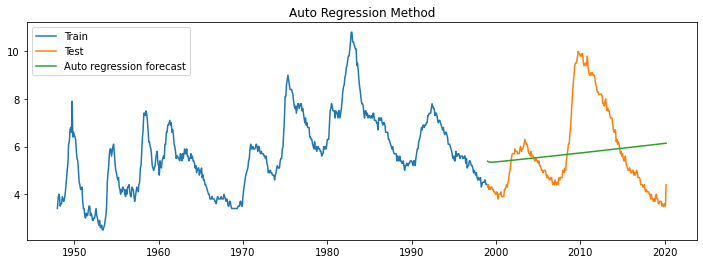

In [38]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_ar['ar_forecast'][test.index.min():])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50
0,Autoregressive (AR) method,1.81,25.38


## Moving average method (MA)

In [40]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 5)) 
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.000507
ma.L1.y    0.055504
ma.L2.y    0.181882
ma.L3.y    0.123451
ma.L4.y    0.099834
ma.L5.y    0.151700
dtype: float64


### Recover original time series

In [41]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

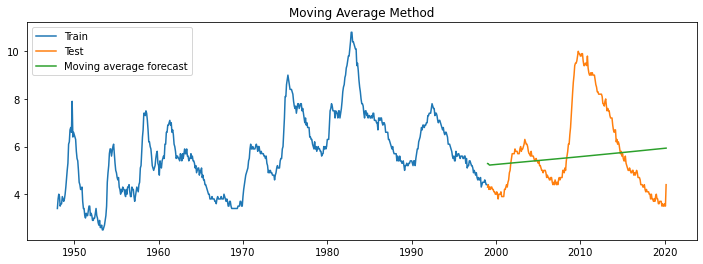

In [42]:
plt.figure(figsize=(12,4))
plt.plot(data['UnemploymentRate'][:train_len], label='Train')
plt.plot(data['UnemploymentRate'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

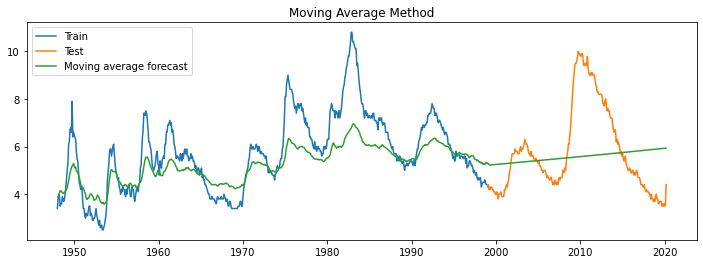

In [54]:
plt.figure(figsize=(12,4))
plt.plot(data['UnemploymentRate'][:train_len], label='Train')
plt.plot(data['UnemploymentRate'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [43]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_ma['ma_forecast'][test.index.min():])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50
0,Autoregressive (AR) method,1.81,25.38
0,Moving Average (MA) method,1.82,24.26


In [57]:
y_hat_ma['ma_forecast'].head()

1948-02-01    3.901980
1948-03-01    3.950280
1948-04-01    4.057868
1948-05-01    4.143129
1948-06-01    4.141527
Freq: MS, dtype: float64

### AR(12)

In [44]:
model = ARIMA(train_data_boxcox_diff, order=(12, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const       0.000466
ar.L1.y     0.060690
ar.L2.y     0.161198
ar.L3.y     0.118645
ar.L4.y     0.090456
ar.L5.y     0.107079
ar.L6.y     0.008286
ar.L7.y    -0.029412
ar.L8.y     0.032450
ar.L9.y     0.006198
ar.L10.y   -0.124660
ar.L11.y    0.047125
ar.L12.y   -0.148533
dtype: float64


### Recover original time series

In [45]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast12'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

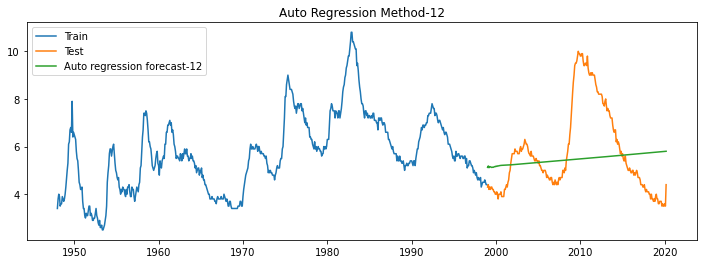

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_ar['ar_forecast12'][test.index.min():], label='Auto regression forecast-12')
plt.legend(loc='best')
plt.title('Auto Regression Method-12')
plt.show()

### Calculate RMSE and MAPE

In [47]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_ar['ar_forecast12'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_ar['ar_forecast12'][test.index.min():])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method-12'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50
0,Autoregressive (AR) method,1.81,25.38
0,Moving Average (MA) method,1.82,24.26
0,Autoregressive (AR) method-12,1.83,23.62


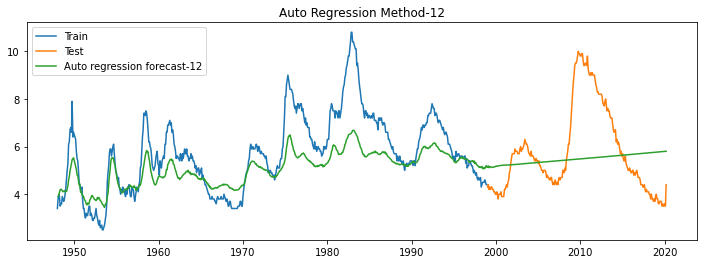

In [49]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_ar['ar_forecast12'], label='Auto regression forecast-12')
plt.legend(loc='best')
plt.title('Auto Regression Method-12')
plt.show()

In [53]:
y_hat_ar['ar_forecast12'].head()

1948-02-01    3.901819
1948-03-01    3.960922
1948-04-01    4.082803
1948-05-01    4.188014
1948-06-01    4.210203
Freq: MS, dtype: float64

## Auto regression moving average method (ARMA)

In [64]:
model = ARIMA(train_data_boxcox_diff, order=(12, 0, 5))
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const       0.000453
ar.L1.y    -0.254670
ar.L2.y     0.770406
ar.L3.y     0.582996
ar.L4.y    -0.516075
ar.L5.y    -0.675331
ar.L6.y     0.060899
ar.L7.y     0.051496
ar.L8.y     0.099735
ar.L9.y     0.165447
ar.L10.y   -0.041102
ar.L11.y   -0.034284
ar.L12.y   -0.048920
ma.L1.y     0.284238
ma.L2.y    -0.606843
ma.L3.y    -0.434888
ma.L4.y     0.570918
ma.L5.y     0.740150
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [61]:
data_boxcox_diff.index.max()

Timestamp('2020-03-01 00:00:00')

### Recover original time series

In [65]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

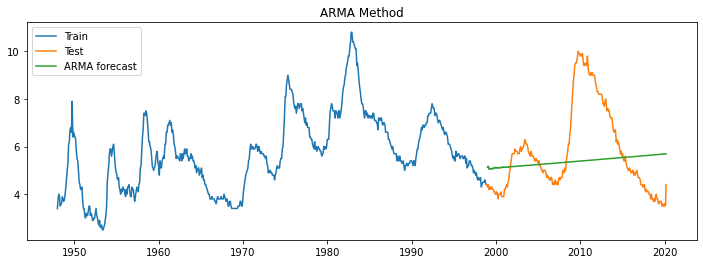

In [66]:
plt.figure(figsize=(12,4))
plt.plot( data['UnemploymentRate'][:train_len-1], label='Train')
plt.plot(data['UnemploymentRate'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [67]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_arma['arma_forecast'][train_len-1:])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50
0,Autoregressive (AR) method,1.81,25.38
0,Moving Average (MA) method,1.82,24.26
0,Autoregressive (AR) method-12,1.83,23.62
0,Autoregressive moving average (ARMA) method,1.85,23.16


## Auto regressive integrated moving average (ARIMA)

In [63]:
model = ARIMA(train_data_boxcox, order=(12, 1, 5))
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const         0.000453
ar.L1.D.y    -0.254670
ar.L2.D.y     0.770406
ar.L3.D.y     0.582996
ar.L4.D.y    -0.516075
ar.L5.D.y    -0.675331
ar.L6.D.y     0.060899
ar.L7.D.y     0.051496
ar.L8.D.y     0.099735
ar.L9.D.y     0.165447
ar.L10.D.y   -0.041102
ar.L11.D.y   -0.034284
ar.L12.D.y   -0.048920
ma.L1.D.y     0.284238
ma.L2.D.y    -0.606843
ma.L3.D.y    -0.434888
ma.L4.D.y     0.570918
ma.L5.D.y     0.740150
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


### Recover original time series forecast

In [68]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

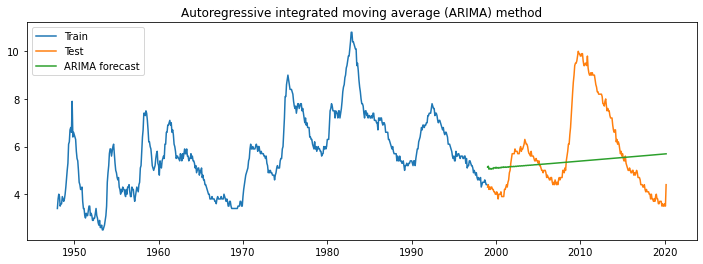

In [69]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [74]:
test.index.min()

Timestamp('1999-01-01 00:00:00')

In [76]:
y_hat_arima['arima_forecast'][test.index.min():]

1999-01-01    5.140042
1999-02-01    5.173856
1999-03-01    5.050507
1999-04-01    5.083850
1999-05-01    5.075690
                ...   
2019-11-01    5.684984
2019-12-01    5.687574
2020-01-01    5.690138
2020-02-01    5.692713
2020-03-01    5.695302
Freq: MS, Length: 255, dtype: float64

### Calculate RMSE and MAPE

In [71]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_arima['arima_forecast'][test.index.min():])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50
0,Autoregressive (AR) method,1.81,25.38
0,Moving Average (MA) method,1.82,24.26
0,Autoregressive (AR) method-12,1.83,23.62
0,Autoregressive moving average (ARMA) method,1.85,23.16
0,Autoregressive integrated moving average (ARIM...,1.85,23.16


## Seasonal auto regressive integrated moving average (SARIMA)

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(2, 1, 4), seasonal_order=(2, 1, 4, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ar.L1       0.607955
ar.L2       0.118793
ma.L1      -0.567886
ma.L2      -0.012593
ma.L3       0.071917
ma.L4       0.049717
ar.S.L12   -0.959726
ar.S.L24   -0.525832
ma.S.L12   -0.261113
ma.S.L24   -0.550521
ma.S.L36   -0.415340
ma.S.L48    0.278246
sigma2      0.001488
dtype: float64


### Recover original time series forecast

In [85]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [87]:
data_boxcox_diff.shape

(866,)

In [88]:
data_boxcox_diff.head()

Month
1948-02-01    0.111226
1948-03-01    0.051293
1948-04-01   -0.025318
1948-05-01   -0.108214
1948-06-01    0.028171
dtype: float64

In [89]:
data_boxcox_diff.tail()

Month
2019-11-01   -0.028171
2019-12-01    0.000000
2020-01-01    0.028171
2020-02-01   -0.028171
2020-03-01    0.228842
dtype: float64

In [95]:
print(data_boxcox.index.min(), data_boxcox.index.max())

1948-01-01 00:00:00 2020-03-01 00:00:00


### Plot train, test and forecast

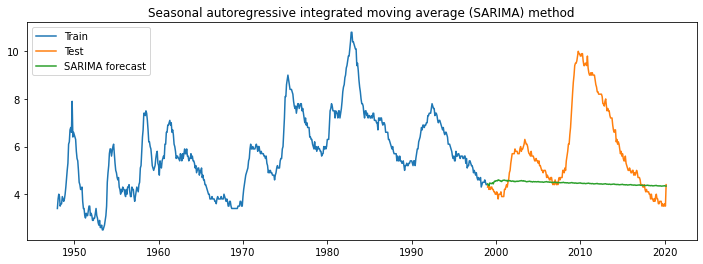

In [93]:
plt.figure(figsize=(12,4))
plt.plot(train['UnemploymentRate'], label='Train')
plt.plot(test['UnemploymentRate'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [81]:
rmse = np.sqrt(mean_squared_error(test['UnemploymentRate'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['UnemploymentRate']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['UnemploymentRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2.27,22.50
0,Simple moving average forecast,2.21,21.99
0,Simple exponential smoothing forecast,2.27,22.50
0,Autoregressive (AR) method,1.81,25.38
0,Moving Average (MA) method,1.82,24.26
0,Autoregressive (AR) method-12,1.83,23.62
0,Autoregressive moving average (ARMA) method,1.85,23.16
0,Autoregressive integrated moving average (ARIM...,1.85,23.16
0,Seasonal autoregressive integrated moving aver...,2.23,21.91
